# Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels as sm
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_excel("loan.xlsx")
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,1985-01-01,1,NaN,NaN,3,0,13648,0.837,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,NaT,2016-05-01,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,1999-04-01,5,NaN,NaN,3,0,1687,0.094,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,NaT,2013-09-01,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,2001-11-01,2,NaN,NaN,2,0,2956,0.985,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,NaT,2016-05-01,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,1996-02-01,1,35.0,NaN,10,0,5598,0.210,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,NaT,2016-04-01,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

# Feature engineering

In [3]:
nacols = df.columns[df.isnull().all()]
nacols

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [4]:
len(nacols)

54

**There are 54 null columns in our dataset and there might be some with empty values, we will get rid of these columns**

In [5]:
df.isnull().mean()

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
                                ...   
tax_liens                     0.000982
tot_hi_cred_lim               1.000000
total_bal_ex_mort             1.000000
total_bc_limit                1.000000
total_il_high_credit_limit    1.000000
Length: 111, dtype: float64

In [6]:
threshold = 0.7
df.isnull().mean()<threshold
df.columns[df.isnull().mean()<threshold]
df[df.columns[df.isnull().mean()<threshold]]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,1985-01-01,1,NaN,3,0,13648,0.837,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,1999-04-01,5,NaN,3,0,1687,0.094,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,2001-11-01,2,NaN,2,0,2956,0.985,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,1996-02-01,1,35.0,10,0,5598,0.210,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,0.1269,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,1996-01-01,0,38.0,15,0,27783,0.539,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,0.0807,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,2007-07-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,1990-11-01,0,0.0,13,0,7274,0.131,40,f,0.00,0.00,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,2010-07-01,80.90,2010-06-01,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,0.1028,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,2007-07-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,1986-12-01,1,5.0,6,0,8847,0.269,9,f,0.00,0.00,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,2010-07-01,281.94,2010-07-01,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,0.0807,

In [7]:
threshold = 0.7

#Dropping columns with missing value rate higher than threshold
df1 = df[df.columns[df.isnull().mean() < threshold]]

df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,1985-01-01,1,NaN,3,0,13648,0.837,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,1999-04-01,5,NaN,3,0,1687,0.094,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,2001-11-01,2,NaN,2,0,2956,0.985,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,1996-02-01,1,35.0,10,0,5598,0.210,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,0.1269,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,1996-01-01,0,38.0,15,0,27783,0.539,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


**Since the data consists of float, int, object etc, let's seperate the numerical and categorical columns**

# Numerical imputation

In [8]:
df1_num = df1.select_dtypes(include = ['float64', 'int64'])

df1_num = df1_num.drop(["id", "member_id"], axis = 1) # id and member_id cols are categorical

df1_num.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975.0,0.1065,162.87,24000.0,27.65,0,1,NaN,3,0,13648,0.837,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0.0,1,0,0.0,0,0.0,0.0
1,2500,2500,2500.0,0.1527,59.83,30000.0,1.00,0,5,NaN,3,0,1687,0.094,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,1,0,0.0,0,0.0,0.0
2,2400,2400,2400.0,0.1596,84.33,12252.0,8.72,0,2,NaN,2,0,2956,0.985,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.0,1,0,0.0,0,0.0,0.0
3,10000,10000,10000.0,0.1349,339.31,49200.0,20.00,0,1,35.0,10,0,5598,0.210,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0,1,0,0.0,0,0.0,0.0
4,3000,3000,3000.0,0.1269,67.79,80000.0,17.94,0,0,38.0,15,0,27783,0.539,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,0.0,1,0,0.0,0,0.0,0.0


In [9]:
# Missing numerical values are replaced by medians, mean can also replace them but outliers of the data would get included too
df1_num = df1_num.fillna(df1_num.median())
df1_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 32 columns):
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
int_rate                      39717 non-null float64
installment                   39717 non-null float64
annual_inc                    39717 non-null float64
dti                           39717 non-null float64
delinq_2yrs                   39717 non-null int64
inq_last_6mths                39717 non-null int64
mths_since_last_delinq        39717 non-null float64
open_acc                      39717 non-null int64
pub_rec                       39717 non-null int64
revol_bal                     39717 non-null int64
revol_util                    39717 non-null float64
total_acc                     39717 non-null int64
out_prncp                     39717 non-null float64
out_prncp_inv                 39717 non-null float64
total_

# Categorical imputation

In [10]:
df1_cat = df1.select_dtypes(include = ['object', 'datetime64[ns]'])

df1_cat.head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,36 months,B,B2,NaN,10+ years,RENT,Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,1985-01-01,f,2015-01-01,2016-05-01,INDIVIDUAL
1,60 months,C,C4,Ryder,< 1 year,RENT,Source Verified,2011-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1999-04-01,f,2013-04-01,2013-09-01,INDIVIDUAL
2,36 months,C,C5,NaN,10+ years,RENT,Not Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,2001-11-01,f,2014-06-01,2016-05-01,INDIVIDUAL
3,36 months,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,1996-02-01,f,2015-01-01,2016-04-01,INDIVIDUAL
4,60 months,B,B5,University Medical Group,1 year,RENT,Source Verified,2011-12-01,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,1996-01-01,f,2016-05-01,2016-05-01,INDIVIDUAL


In [11]:
df1_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
term                   39717 non-null object
grade                  39717 non-null object
sub_grade              39717 non-null object
emp_title              37258 non-null object
emp_length             38642 non-null object
home_ownership         39717 non-null object
verification_status    39717 non-null object
issue_d                39717 non-null datetime64[ns]
loan_status            39717 non-null object
pymnt_plan             39717 non-null object
url                    39717 non-null object
desc                   26777 non-null object
purpose                39717 non-null object
title                  39705 non-null object
zip_code               39717 non-null object
addr_state             39717 non-null object
earliest_cr_line       39717 non-null datetime64[ns]
initial_list_status    39717 non-null object
last_pymnt_d           39646 non-null datetime64[ns]
last_credit_

In [12]:
df1_cat.isnull().sum()

term                       0
grade                      0
sub_grade                  0
emp_title               2459
emp_length              1075
home_ownership             0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
url                        0
desc                   12940
purpose                    0
title                     12
zip_code                   0
addr_state                 0
earliest_cr_line           0
initial_list_status        0
last_pymnt_d              71
last_credit_pull_d         2
application_type           0
dtype: int64

In [13]:
df1_cat = df1_cat.fillna(df1_cat.mode())
df1_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
term                   39717 non-null object
grade                  39717 non-null object
sub_grade              39717 non-null object
emp_title              37259 non-null object
emp_length             38642 non-null object
home_ownership         39717 non-null object
verification_status    39717 non-null object
issue_d                39717 non-null datetime64[ns]
loan_status            39717 non-null object
pymnt_plan             39717 non-null object
url                    39717 non-null object
desc                   26777 non-null object
purpose                39717 non-null object
title                  39705 non-null object
zip_code               39717 non-null object
addr_state             39717 non-null object
earliest_cr_line       39717 non-null datetime64[ns]
initial_list_status    39717 non-null object
last_pymnt_d           39646 non-null datetime64[ns]
last_credit_

In [14]:
n_emp = df1_cat["emp_title"].nunique()
print(n_emp)

n_desc = df1_cat["desc"].nunique()
print(n_desc)

n_title = df1_cat["title"].nunique()
print(n_title)

n_url = df1_cat["url"].nunique()
print(n_url)

28820
26527
19612
39717


**Above cell shows us the no.of unique values in few categorical columns, since they are very high, we have to drop them**

In [15]:
df1_cat = df1_cat.drop(["emp_title", "desc", "title", "url"], axis = 1)
df1_cat.head()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,36 months,B,B2,10+ years,RENT,Verified,2011-12-01,Fully Paid,n,credit_card,860xx,AZ,1985-01-01,f,2015-01-01,2016-05-01,INDIVIDUAL
1,60 months,C,C4,< 1 year,RENT,Source Verified,2011-12-01,Charged Off,n,car,309xx,GA,1999-04-01,f,2013-04-01,2013-09-01,INDIVIDUAL
2,36 months,C,C5,10+ years,RENT,Not Verified,2011-12-01,Fully Paid,n,small_business,606xx,IL,2001-11-01,f,2014-06-01,2016-05-01,INDIVIDUAL
3,36 months,C,C1,10+ years,RENT,Source Verified,2011-12-01,Fully Paid,n,other,917xx,CA,1996-02-01,f,2015-01-01,2016-04-01,INDIVIDUAL
4,60 months,B,B5,1 year,RENT,Source Verified,2011-12-01,Current,n,other,972xx,OR,1996-01-01,f,2016-05-01,2016-05-01,INDIVIDUAL


In [16]:
df1_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 17 columns):
term                   39717 non-null object
grade                  39717 non-null object
sub_grade              39717 non-null object
emp_length             38642 non-null object
home_ownership         39717 non-null object
verification_status    39717 non-null object
issue_d                39717 non-null datetime64[ns]
loan_status            39717 non-null object
pymnt_plan             39717 non-null object
purpose                39717 non-null object
zip_code               39717 non-null object
addr_state             39717 non-null object
earliest_cr_line       39717 non-null datetime64[ns]
initial_list_status    39717 non-null object
last_pymnt_d           39646 non-null datetime64[ns]
last_credit_pull_d     39715 non-null datetime64[ns]
application_type       39717 non-null object
dtypes: datetime64[ns](4), object(13)
memory usage: 5.2+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a25e04710>,
      dtype=object)

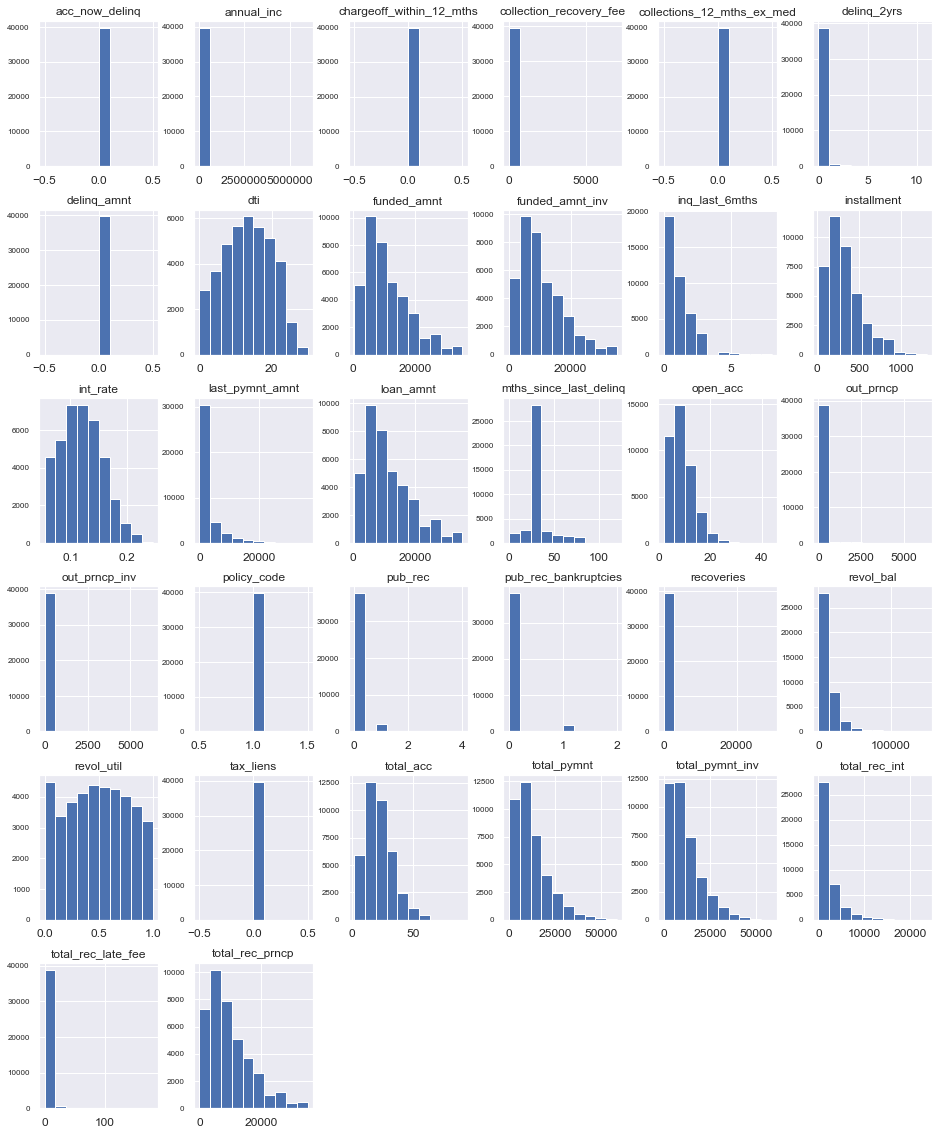

In [17]:
df1_num.hist(figsize = (16, 20), xlabelsize = 12, ylabelsize = 8)

In [18]:
df1_num.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [19]:
len(df1_num.columns)

32

# Handling outliers

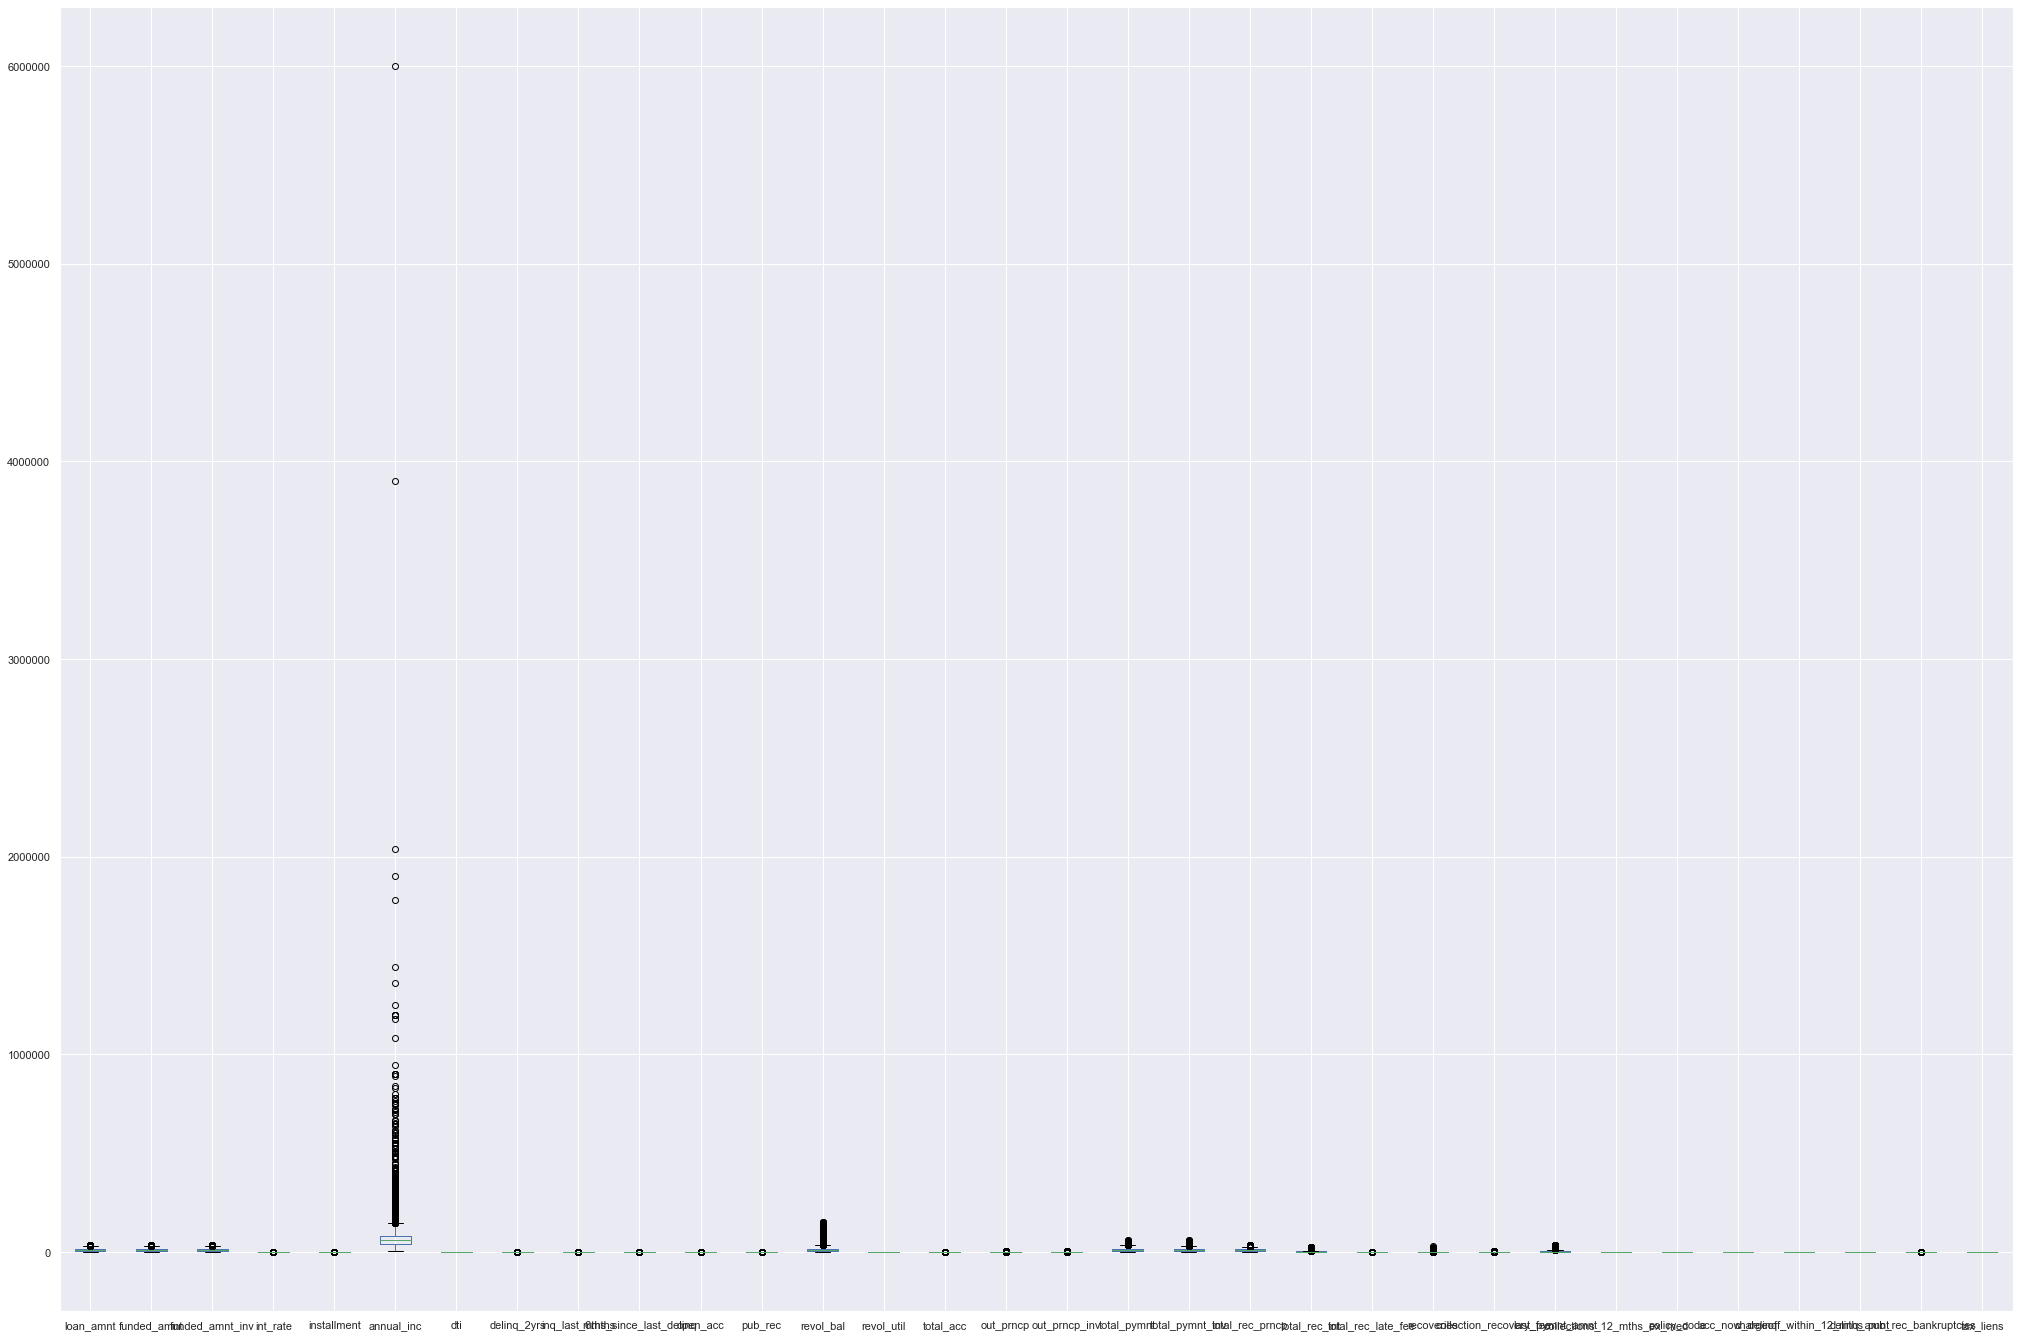

In [20]:
df1_num.boxplot(figsize = (35, 24))

**The boxplot created is hard to visualize due to many cols, we will split it in to 2 for proper visualization**

In [21]:
df1_num1 = df1_num.iloc[:, 0:15]
df1_num1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,5000,5000,4975.0,0.1065,162.87,24000.0,27.65,0,1,34.0,3,0,13648,0.837,9
1,2500,2500,2500.0,0.1527,59.83,30000.0,1.00,0,5,34.0,3,0,1687,0.094,4
2,2400,2400,2400.0,0.1596,84.33,12252.0,8.72,0,2,34.0,2,0,2956,0.985,10
3,10000,10000,10000.0,0.1349,339.31,49200.0,20.00,0,1,35.0,10,0,5598,0.210,37
4,3000,3000,3000.0,0.1269,67.79,80000.0,17.94,0,0,38.0,15,0,27783,0.539,38


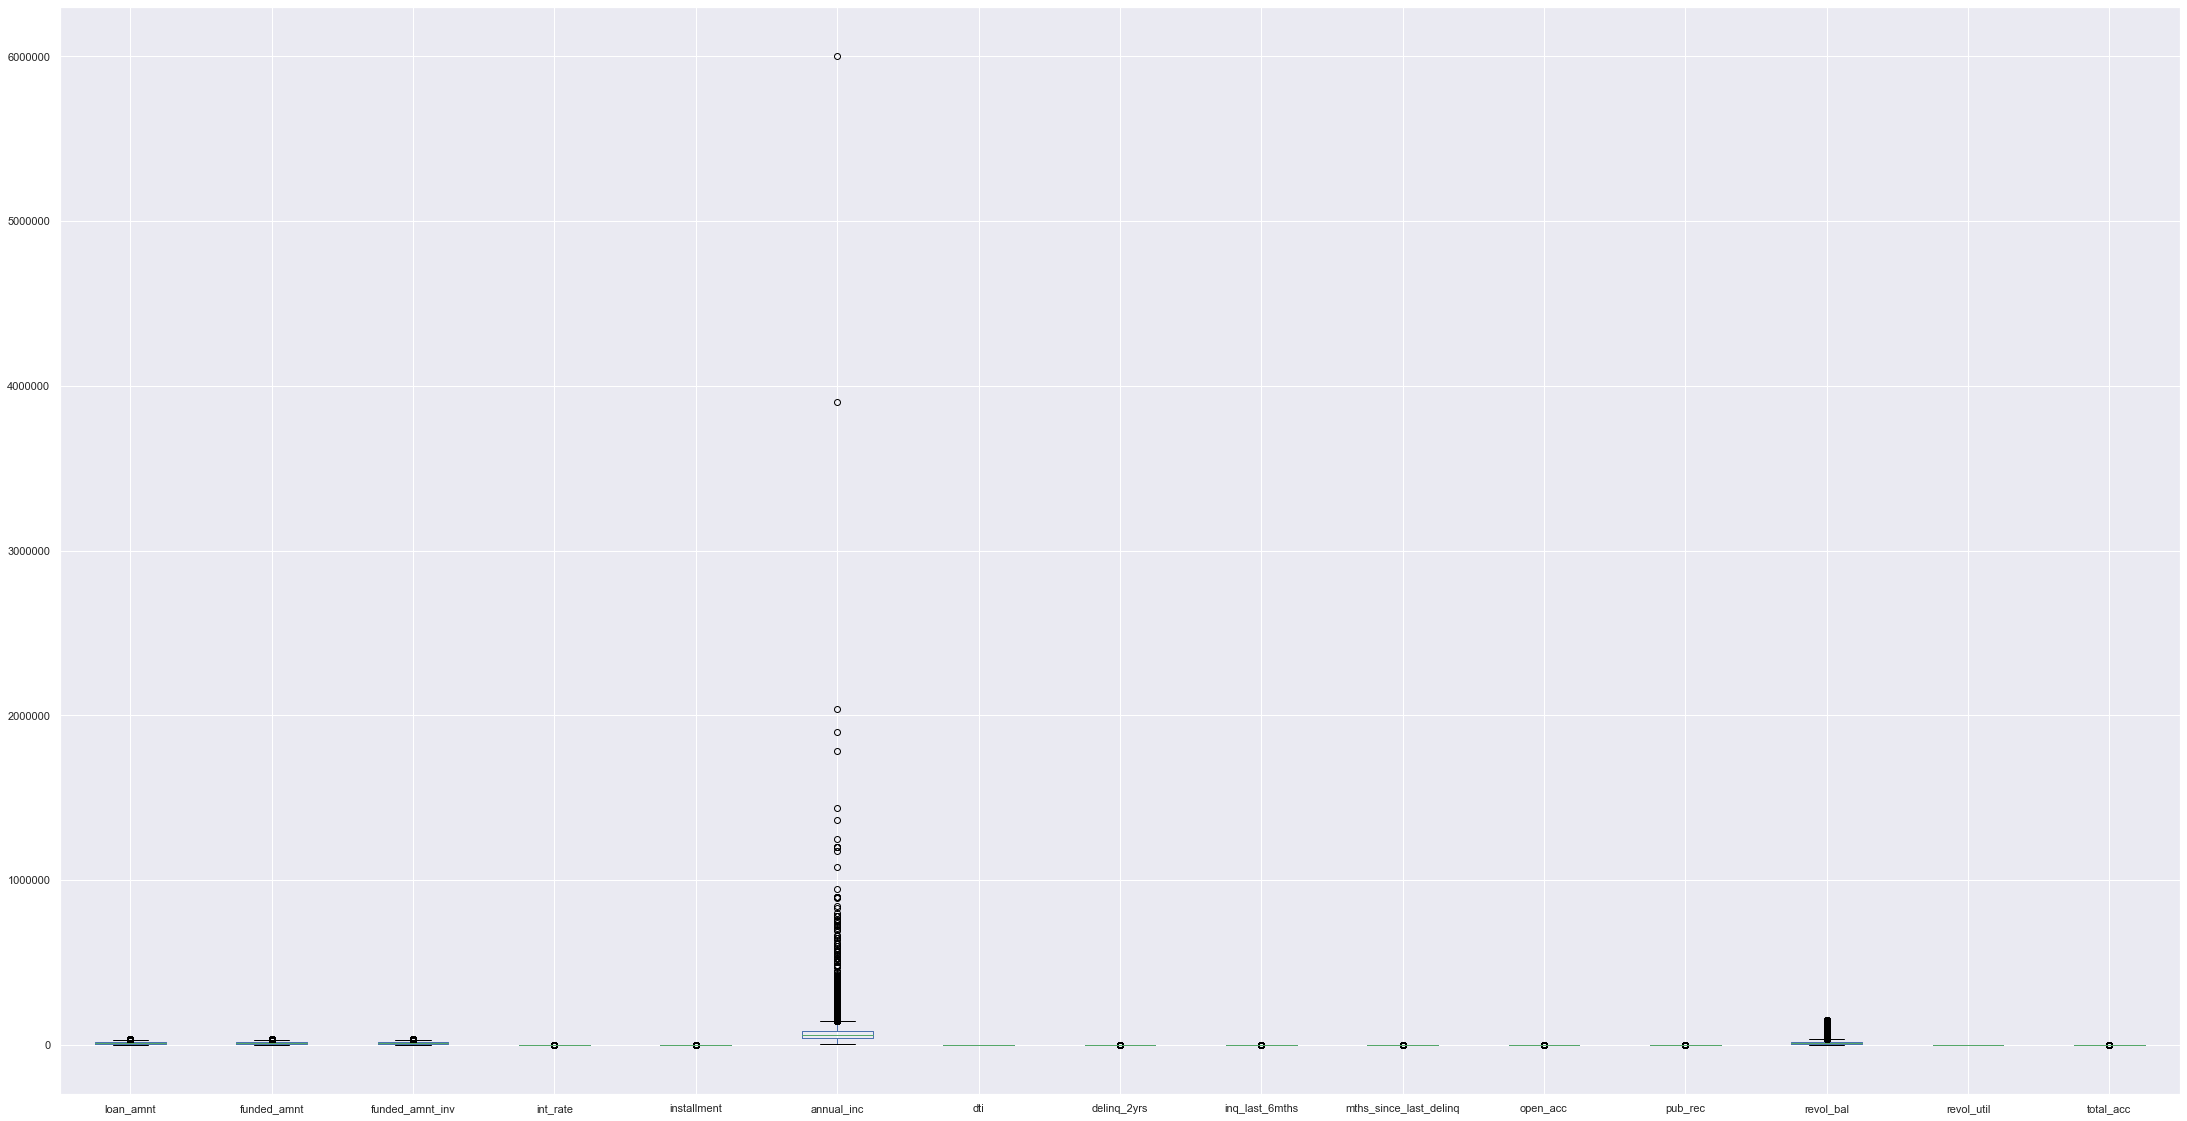

In [22]:
df1_num1.boxplot(figsize = (38,20))

In [23]:
df1_num2 = df1_num.iloc[:, 16:]
df1_num2.head()

,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0.0,1,0,0.0,0,0.0,0.0
1,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,1,0,0.0,0,0.0,0.0
2,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.0,1,0,0.0,0,0.0,0.0
3,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0,1,0,0.0,0,0.0,0.0
4,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,0.0,1,0,0.0,0,0.0,0.0


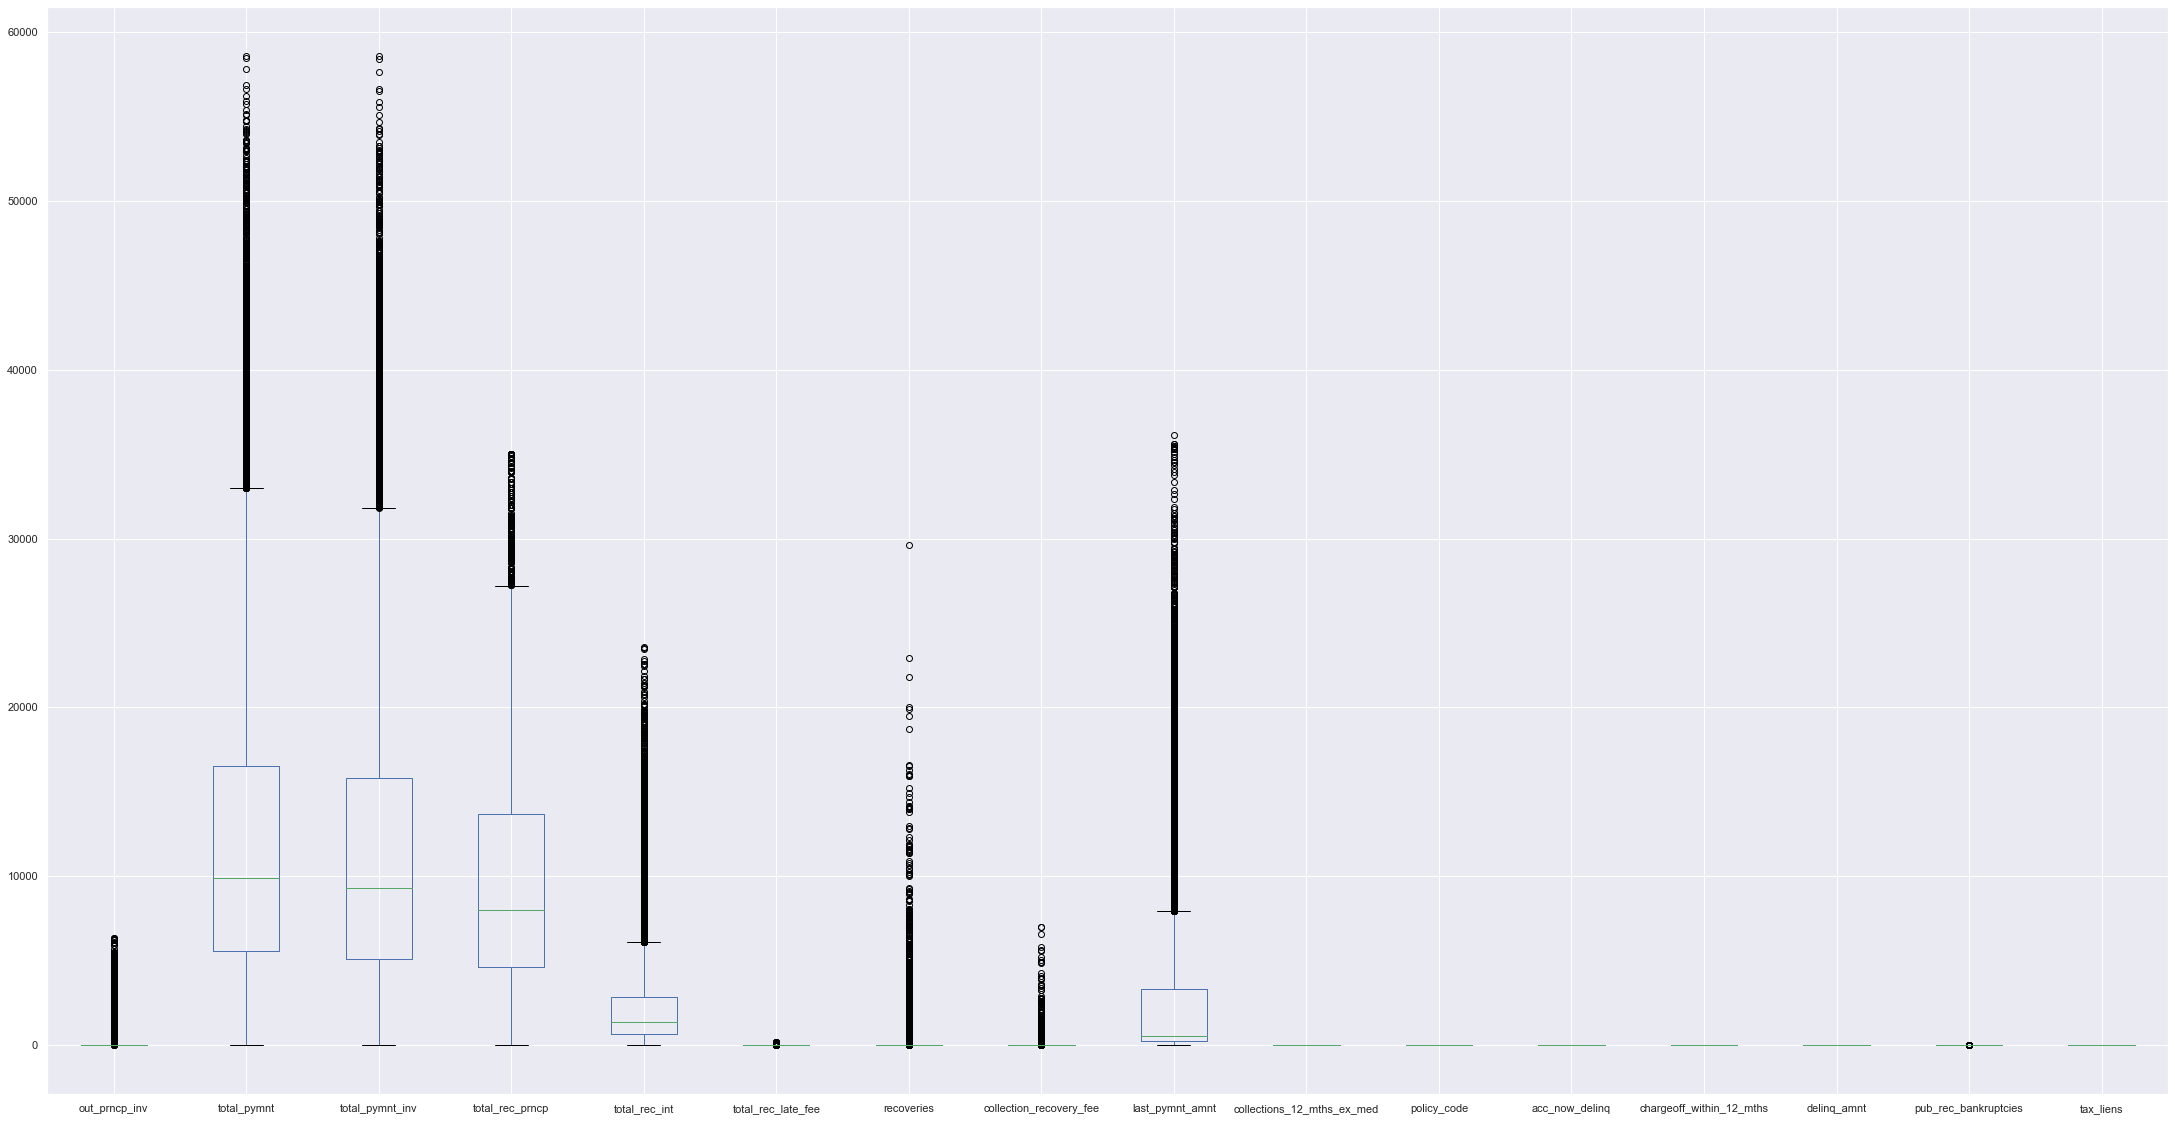

In [24]:
df1_num2.boxplot(figsize = (38,20))

**The boxplots of both the halves shows us the presence of outliers. Let's get rid of it**

In [25]:
upper_lim = df1_num[["annual_inc", "revol_bal", "out_prncp_inv", 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
                    'total_rec_int', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt']].quantile(.95)

lower_lim = df1_num[["annual_inc", "revol_bal", "out_prncp_inv", 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
                    'total_rec_int', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt']].quantile(.05)

In [26]:
upper_lim

annual_inc                 142000.00000
revol_bal                   41656.40000
out_prncp_inv                   0.00000
total_pymnt                 30245.11853
total_pymnt_inv             29627.23600
total_rec_prncp             24999.98200
total_rec_int                7575.81200
recoveries                    362.41800
collection_recovery_fee         5.15200
last_pymnt_amnt             12183.94400
Name: 0.95, dtype: float64

In [27]:
lower_lim

annual_inc                 24000.000000
revol_bal                    321.800000
out_prncp_inv                  0.000000
total_pymnt                 1887.957036
total_pymnt_inv             1420.408000
total_rec_prncp             1339.842000
total_rec_int                186.168000
recoveries                     0.000000
collection_recovery_fee        0.000000
last_pymnt_amnt               43.340000
Name: 0.05, dtype: float64

In [28]:
dfn = (df1_num[["annual_inc", "revol_bal", "out_prncp_inv", 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
                    'total_rec_int', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt']] < upper_lim) & (df1_num[["annual_inc", "revol_bal", "out_prncp_inv", 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
                    'total_rec_int', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt']] > lower_lim)

dfn.head()

,annual_inc,revol_bal,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_amnt
0,False,True,False,True,True,True,True,False,False,True
1,True,True,False,False,False,False,True,True,True,True
2,False,True,False,True,True,True,True,False,False,True
3,True,True,False,True,True,True,True,False,False,True
4,True,True,False,True,True,True,True,False,False,True


In [29]:
dfn.shape

(39717, 10)

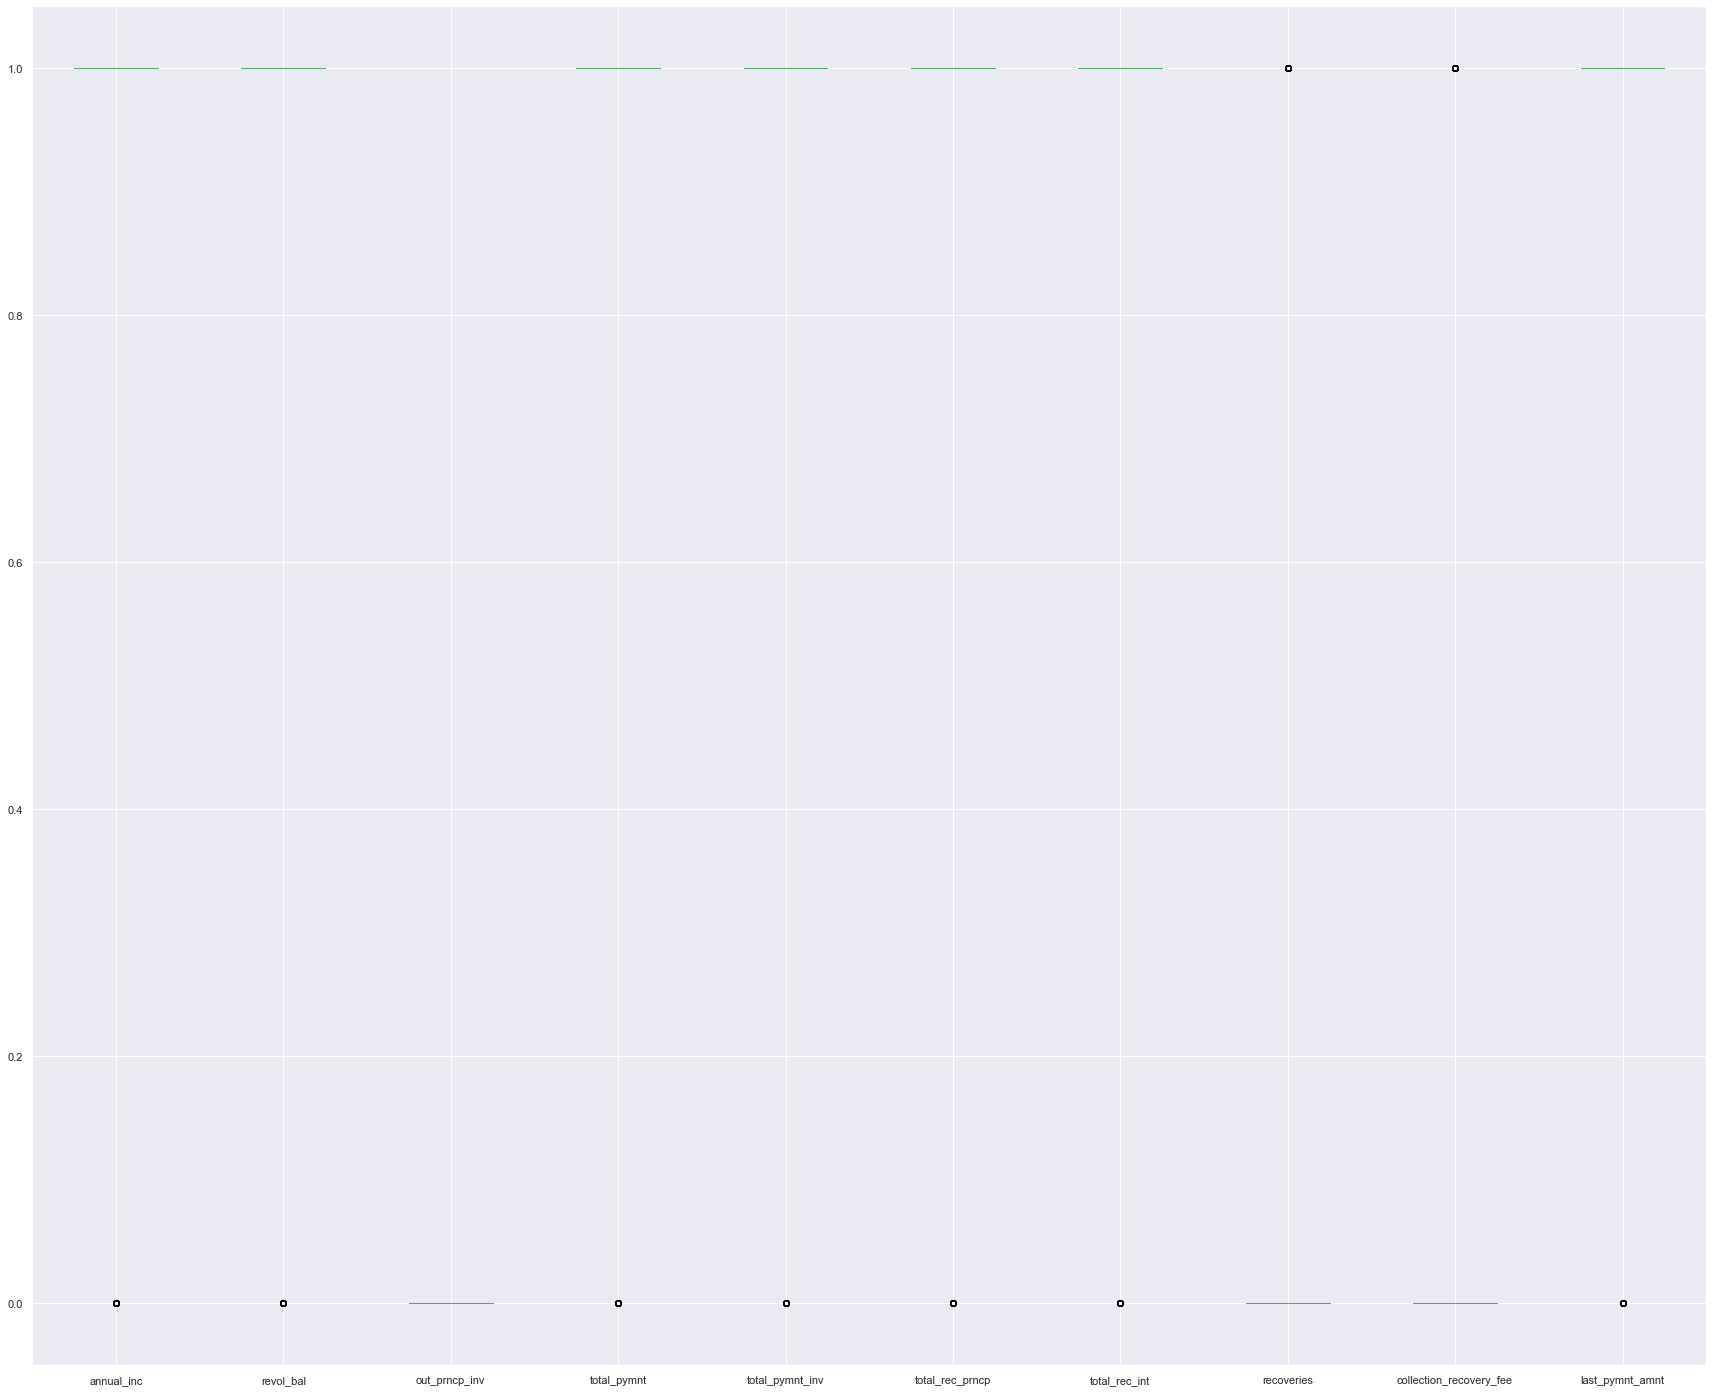

In [30]:
dfn.boxplot(figsize = (30,25))

**We can see, the outliers have been removed**

# Binning

**Binning is done to prevent the model from overfitting. It can be done on categorical as well as numerical data**

In [31]:
df1_num["loan_amnt"].max()

35000

In [32]:
df1_num["loan_amnt"].min()

500

In [33]:
np.linspace(500,35000,5)

array([  500.,  9125., 17750., 26375., 35000.])

In [34]:
df1_num1['bin'] = pd.cut(df1_num1['loan_amnt'], bins = [500,9125,17750,26375,35000],
                         labels = ["Low", "Mid", "High", "Extremely High"])

In [35]:
df1_num1[["loan_amnt", "bin"]].head(12)

,loan_amnt,bin
0,5000,Low
1,2500,Low
2,2400,Low
3,10000,Mid
4,3000,Low
5,5000,Low
6,7000,Low
7,3000,Low
8,5600,Low
9,5375,Low


In [36]:
df1_num1.loc[df1_num1.bin == "Mid"].head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,bin
3,10000,10000,10000.0,0.1349,339.31,49200.00,20.00,0,1,35.0,10,0,5598,0.210,37,Mid
11,12000,12000,12000.0,0.1269,402.54,75000.00,10.78,0,0,34.0,12,0,23336,0.671,34,Mid
14,10000,10000,10000.0,0.1065,325.74,100000.00,7.06,0,2,34.0,14,0,11997,0.555,29,Mid
16,10000,10000,10000.0,0.1527,347.98,42000.00,18.60,0,2,61.0,14,0,24043,0.702,28,Mid
19,9200,9200,9200.0,0.0603,280.01,77385.19,9.86,0,0,34.0,8,0,7314,0.231,28,Mid


# One-hot encoding

**This technique changes the categorical data in to numbers. This is done to make the data understandable for algorithms**

In [37]:
df1_cat_dummies = pd.get_dummies(df1_cat[["home_ownership", "loan_status", "verification_status", "grade"]])
#data = data.join(encoded_columns).drop('column', axis=1)

In [38]:
df1_cat.head()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,36 months,B,B2,10+ years,RENT,Verified,2011-12-01,Fully Paid,n,credit_card,860xx,AZ,1985-01-01,f,2015-01-01,2016-05-01,INDIVIDUAL
1,60 months,C,C4,< 1 year,RENT,Source Verified,2011-12-01,Charged Off,n,car,309xx,GA,1999-04-01,f,2013-04-01,2013-09-01,INDIVIDUAL
2,36 months,C,C5,10+ years,RENT,Not Verified,2011-12-01,Fully Paid,n,small_business,606xx,IL,2001-11-01,f,2014-06-01,2016-05-01,INDIVIDUAL
3,36 months,C,C1,10+ years,RENT,Source Verified,2011-12-01,Fully Paid,n,other,917xx,CA,1996-02-01,f,2015-01-01,2016-04-01,INDIVIDUAL
4,60 months,B,B5,1 year,RENT,Source Verified,2011-12-01,Current,n,other,972xx,OR,1996-01-01,f,2016-05-01,2016-05-01,INDIVIDUAL


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a238ce990>,
      dtype=object)

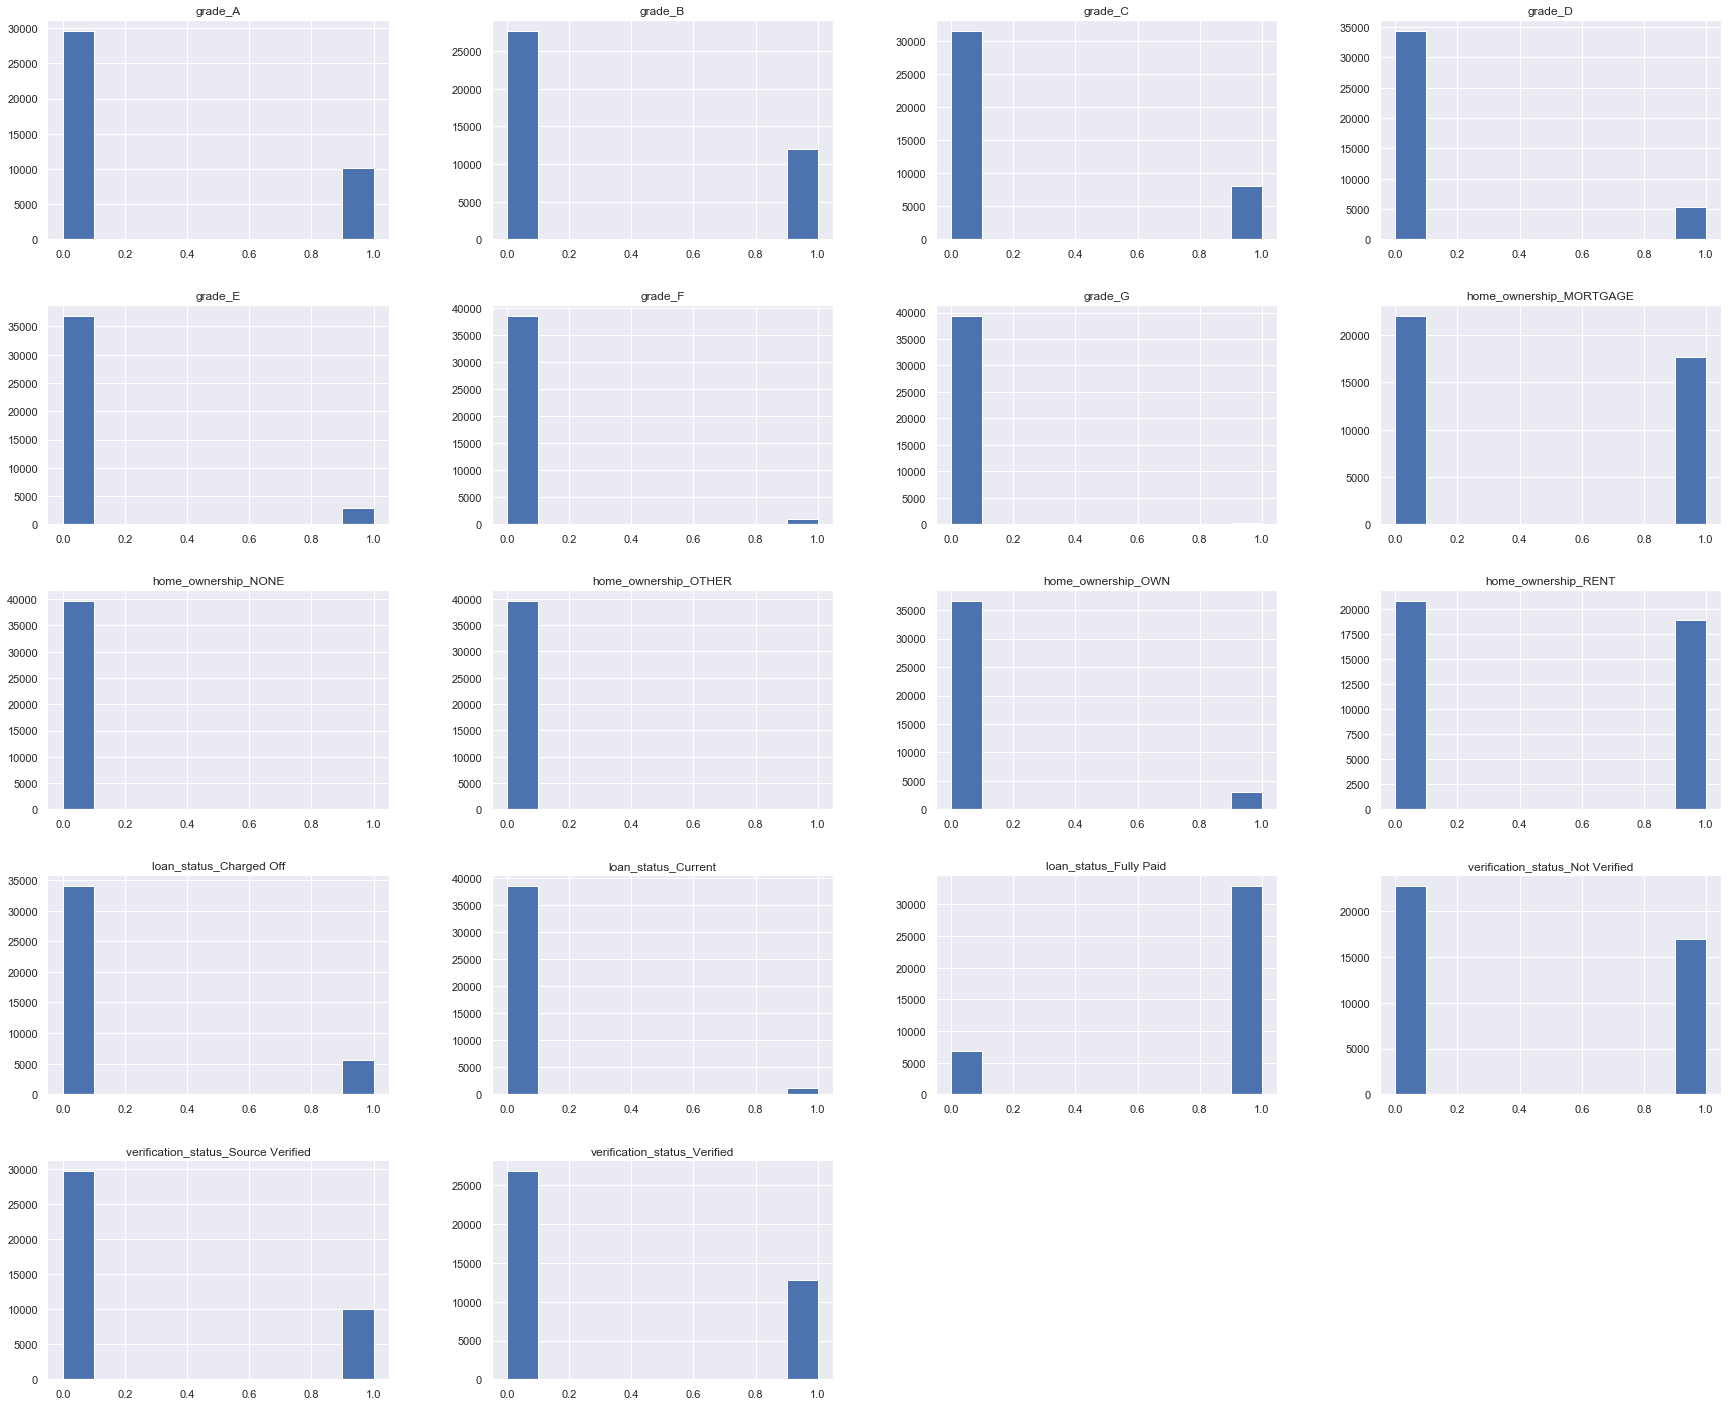

In [39]:
df1_cat_dummies.hist(figsize = (30,25))

# Grouping Operations

In [40]:
df1.groupby('term').agg(lambda x: x.value_counts().index[0])

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
term,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
36 months,1052670,745584,10000,10000,5000.0,0.0751,311.11,A,A4,US Army,10+ years,RENT,60000.0,Not Verified,2011-11-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,debt_consolidation,Debt Consolidation,100xx,CA,0.0,0,1999-10-01,0,0.0,6,0,0,0.0,15,f,0.0,0.0,11196.56943,0.0,10000.0,0.0,0.0,0.0,0.0,2013-03-01,0.00,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
60 months,834630,939511,12000,12000,12000.0,0.1349,276.06,B,B5,US Army,10+ years,MORTGAGE,60000.0,Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,debt_consolidation,Debt Consolidation,070xx,CA,0.0,0,1998-11-01,0,19.0,7,0,0,0.0,16,f,0.0,0.0,13304.21000,0.0,12000.0,0.0,0.0,0.0,0.0,2016-05-01,276.06,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


# Extracting Date

In [41]:
from datetime import date as dt

timestamp = pd.DataFrame(df1_cat["issue_d"])

timestamp["Date"] = pd.to_datetime(df1_cat["issue_d"], format="%Y-%m-%d")

timestamp['Year'] = df1_cat["issue_d"].dt.year

timestamp['Month'] = df1_cat["issue_d"].dt.month

timestamp['Day'] = df1_cat["issue_d"].dt.day_name()

In [42]:
timestamp.drop("issue_d", axis=1)

,Date,Year,Month,Day
0,2011-12-01,2011,12,Thursday
1,2011-12-01,2011,12,Thursday
2,2011-12-01,2011,12,Thursday
3,2011-12-01,2011,12,Thursday
4,2011-12-01,2011,12,Thursday
...,...,...,...,...
39712,2007-07-01,2007,7,Sunday
39713,2007-07-01,2007,7,Sunday
39714,2007-07-01,2007,7,Sunday
39715,2007-07-01,2007,7,Sunday


**The rest of the features will be worked on different data**

# Log Transform

In [43]:
dataLT = pd.DataFrame({'value':[32,75, -3, 8, 98, 26, 39, -52]})
dataLT['log(x+1)'] = (dataLT['value']+1).transform(np.log)

#Negative Values Handling
#Note that the values are different
dataLT['log(x-min(x)+1)'] = (dataLT['value']-dataLT['value'].min()+1) .transform(np.log)

In [44]:
dataLT

,value,log(x+1),log(x-min(x)+1)
0,32,3.496508,4.442651
1,75,4.330733,4.852030
2,-3,NaN,3.912023
3,8,2.197225,4.110874
4,98,4.595120,5.017280
5,26,3.295837,4.369448
6,39,3.688879,4.521789
7,-52,NaN,0.000000


# Scaling

**The numerical features of the dataset don't have a certain range and they differ from each other.
We cannot expect age and income columns to have the same range. But from the machine learning point of view these two columns can be compared by scaling**


**Scaling has 2 types: 1. Normalization, 2. Standardization**

**Normalization**

In [45]:
# We will create our own small dataset

data = pd.DataFrame({'value':[32,75, -3, 8, 98, 26, 39, -52]})

data['normalized'] = (data['value'] - data['value'].min()) / (data['value'].max() - data['value'].min())

In [46]:
data

,value,normalized
0,32,0.560000
1,75,0.846667
2,-3,0.326667
3,8,0.400000
4,98,1.000000
5,26,0.520000
6,39,0.606667
7,-52,0.000000


In [47]:
data1 = pd.DataFrame({'value':[32,75, -3, 8, 98, 26, 39, -52]})

data1['standardized'] = (data1['value'] - data1['value'].mean()) / data1['value'].std()

In [48]:
data1

,value,standardized
0,32,0.089078
1,75,1.017648
2,-3,-0.666735
3,8,-0.429194
4,98,1.514324
5,26,-0.040490
6,39,0.240240
7,-52,-1.724872


# Feature Split

In [49]:
name = pd.DataFrame({"Name" : ["Sajid Khan", "Aniket Barate", "Vishal Choudhary", "Abhay Jawale"]})
name

,Name
0,Sajid Khan
1,Aniket Barate
2,Vishal Choudhary
3,Abhay Jawale


In [50]:
name["First Name"] = name.Name.str.split(" ").map(lambda x: x[0])

name["Last Name"] = name.Name.str.split(" ").map(lambda x: x[1])

In [51]:
name

,Name,First Name,Last Name
0,Sajid Khan,Sajid,Khan
1,Aniket Barate,Aniket,Barate
2,Vishal Choudhary,Vishal,Choudhary
3,Abhay Jawale,Abhay,Jawale


### Feature_Engineering_Encoding

In [53]:
#conda install -c conda-forge category_encoders

In [56]:
import pandas as pd
import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

import category_encoders as ce
#from feature_engineering import encoding

## Load Dataset

In [57]:
from platform import python_version

In [58]:
print(python_version())

3.7.4


In [59]:
use_cols = [
    'Pclass', 'Sex', 'Age', 'Fare', 'SibSp',
    'Survived'
]

data = pd.read_csv('titanic.csv', usecols=use_cols)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,1,53.1000
4,0,3,male,35.0,0,8.0500


In [60]:
X_train, X_test, y_train, y_test = train_test_split(data, data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 6), (268, 6))

## One-hot encoding
replace the categorical variable by different boolean variables (0/1) to indicate whether or not certain label is true for that observation

In [61]:
data1 = pd.get_dummies(data,drop_first=True)

In [62]:
data1.head()

,Survived,Pclass,Age,SibSp,Fare,Sex_male
0,0,3,22.0,1,7.2500,1
1,1,1,38.0,1,71.2833,0
2,1,3,26.0,0,7.9250,0
3,1,1,35.0,1,53.1000,0
4,0,3,35.0,0,8.0500,1


## Ordinal-encoding
replace the labels by some ordinal number if ordinal is meaningful

In [63]:
ord_enc = ce.OrdinalEncoder(cols=['Sex']).fit(X_train,y_train)

In [64]:
data4 = ord_enc.transform(data)
print(data4.head(5))

   Survived  Pclass  Sex   Age  SibSp     Fare
0         0       3    1  22.0      1   7.2500
1         1       1    2  38.0      1  71.2833
2         1       3    2  26.0      0   7.9250
3         1       1    2  35.0      1  53.1000
4         0       3    1  35.0      0   8.0500


## Target-encoding
Similar to mean encoding, but use both posterior probability and prior probability of the target

In [68]:
# create the encoder and fit with our data
target_enc = ce.TargetEncoder(cols=['Sex']).fit(X_train,y_train)

In [69]:
# perform transformation
# data.Survived.groupby(data['Sex']).agg(['mean'])
data2 = target_enc.transform(data)

In [70]:
# check the result
data2.head()

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,0.196078,22.0,1,7.2500
1,1,1,0.753488,38.0,1,71.2833
2,1,3,0.753488,26.0,0,7.9250
3,1,1,0.753488,35.0,1,53.1000
4,0,3,0.196078,35.0,0,8.0500


## WOE-encoding
replace the label  with Weight of Evidence of each label. WOE is computed from the basic odds ratio: 

ln( (Proportion of Good Outcomes) / (Proportion of Bad Outcomes))

In [71]:
woe_enc = ce.WOEEncoder(cols=['Sex']).fit(X_train,y_train)

In [72]:
data3 = woe_enc.transform(data)

In [73]:
data3.head(5)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,-0.950742,22.0,1,7.2500
1,1,1,1.555633,38.0,1,71.2833
2,1,3,1.555633,26.0,0,7.9250
3,1,1,1.555633,35.0,1,53.1000
4,0,3,-0.950742,35.0,0,8.0500


# Feature Importance_Select Best features

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.
Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.
Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

In [74]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [75]:
data = pd.read_csv("Mobile Price_train.csv")

In [76]:
data.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0


In [77]:
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

In [78]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [79]:
fit.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [80]:
X.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [81]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Specs','Score']
featureScores
#print(featureScores.nlargest(10,'Score')) 

,Specs,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [82]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878
